# Project: Web Scraping & NLP Analysis
**Author:** [Andi L. M. /MandhikaBGR]
**Date:** 2025

## Deskripsi Proyek
Proyek ini bertujuan untuk mengambil data kutipan secara otomatis dari website `quotes.toscrape.com`, membersihkan data teks, dan melakukan analisis Natural Language Processing (NLP) sederhana untuk menemukan topik/kata kunci yang paling sering muncul.

**Tahapan:**
1. **Acquisition:** Mengambil data menggunakan `requests` dan `BeautifulSoup`.
2. **Cleansing:** Membersihkan tanda baca dan *stop words* menggunakan `pandas` dan `nltk`.
3. **Visualization:** Menampilkan hasil analisis frekuensi kata menggunakan `matplotlib`.

In [6]:
# Import Library yang dibutuhkan
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

# Download data NLTK (hanya perlu sekali)
nltk.download('stopwords')
print("Library berhasil dimuat.")

Library berhasil dimuat.


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ZK\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Tahap 1: Web Scraping
Pada tahap ini, kita membangun bot untuk mengambil data 'Quote' dan 'Author' dari seluruh halaman yang tersedia. Bot akan berhenti otomatis jika tidak menemukan tombol 'Next'.

In [7]:
base_url = "http://quotes.toscrape.com"
url_sekarang = "/page/1/"
data_semua = []

print("Memulai proses scraping...")

while True:
    # Request ke halaman
    full_url = base_url + url_sekarang
    response = requests.get(full_url)
    soup = BeautifulSoup(response.text, "html.parser")

    # Ambil elemen kutipan
    quotes = soup.find_all('div', class_='quote')
    
    for q in quotes:
        text = q.find('span', class_='text').text
        author = q.find('small', class_='author').text
        data_semua.append({'Isi Kutipan': text, 'Penulis': author})

    # Cek tombol Next
    tombol_next = soup.find('li', class_='next')
    if tombol_next:
        url_sekarang = tombol_next.find('a')['href']
        # print(f"Lanjut ke: {url_sekarang}") # Opsional: nyalakan jika ingin melihat progress
        time.sleep(0.5) # Jeda sopan agar server tidak down
    else:
        print("Selesai! Semua halaman telah diproses.")
        break

# Simpan ke DataFrame
df = pd.DataFrame(data_semua)
print(f"Total data didapatkan: {len(df)} baris")

Memulai proses scraping...
Selesai! Semua halaman telah diproses.
Total data didapatkan: 100 baris


## Tahap 2: Data Cleansing & Processing
Data mentah yang didapat masih mengandung karakter yang tidak diinginkan (tanda kutip). Kita juga akan membuang kata umum (Stop Words) agar analisis topik lebih akurat.

In [8]:
# 1. Membersihkan tanda kutip keriting
df['Isi Kutipan'] = df['Isi Kutipan'].str.replace('“', '').str.replace('”', '')

# 2. Menggabungkan seluruh teks untuk analisis kata
teks_gabungan = " ".join(df['Isi Kutipan']).lower()
daftar_kata = teks_gabungan.split()

# 3. Filter Stop Words (Kata sambung yang tidak bermakna)
stop_words_inggris = set(stopwords.words('english'))
kata_bersih = [kata for kata in daftar_kata if kata not in stop_words_inggris]

print(f"Jumlah kata sebelum filter: {len(daftar_kata)}")
print(f"Jumlah kata setelah filter: {len(kata_bersih)}")

Jumlah kata sebelum filter: 2362
Jumlah kata setelah filter: 1107


## Tahap 3: Visualisasi Insight
Berikut adalah grafik 10 kata kunci yang paling sering muncul dalam kumpulan kutipan tersebut. Ini menggambarkan tema utama dari website.

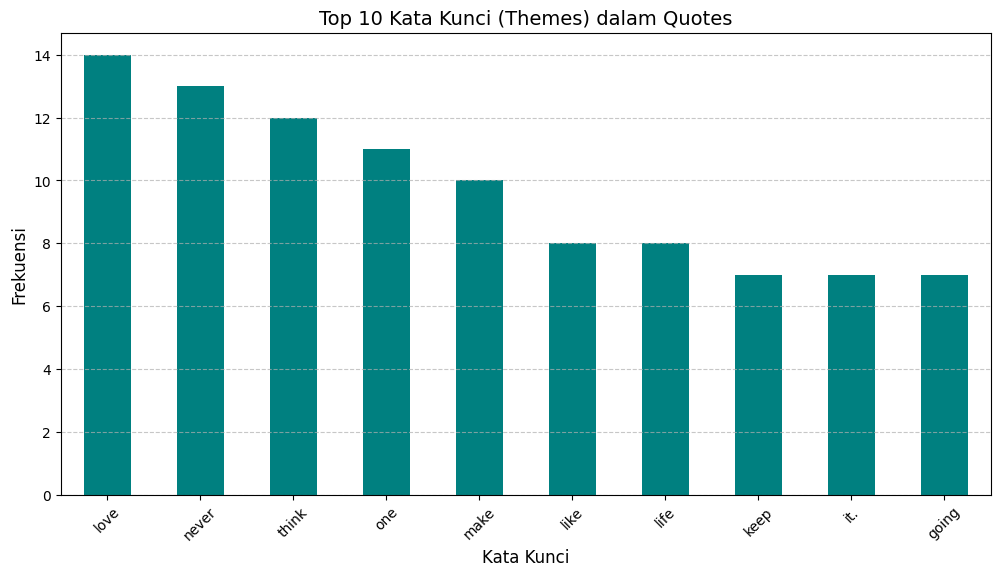

In [9]:
# Menghitung frekuensi kata bersih
cek_kata_bersih = pd.Series(kata_bersih).value_counts()

# Plotting
plt.figure(figsize=(12, 6))
cek_kata_bersih.head(10).plot(kind='bar', color='teal') # Saya ganti warna jadi teal biar estetik

plt.title('Top 10 Kata Kunci (Themes) dalam Quotes', fontsize=14)
plt.xlabel('Kata Kunci', fontsize=12)
plt.ylabel('Frekuensi', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()